
# Reducing Traffic Mortality

## Data Import

Import the required libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sn

Load the required data set

In [6]:
data_miles=pd.read_csv('miles-driven.csv',delimiter='|',header=0)
data_accidnt=pd.read_csv('road-accidents.csv',delimiter='|',header=9)

## EDA-Phase 1

In [7]:
data_miles.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [8]:
data_accidnt.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [9]:
data_miles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [10]:
data_accidnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


As per the results,missing values are not include in both data sets.So,No need to do mising value imputations for the data sets.

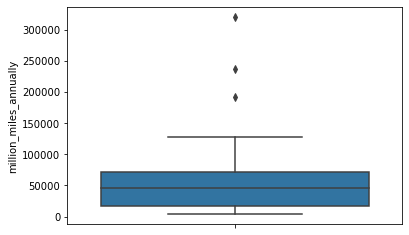

In [11]:
sn.boxplot(y=data_miles['million_miles_annually']);

Boxplot shows that, 'miles-driven' data set includes some outlires and we should impute them properly.

In [12]:
data_accidnt.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


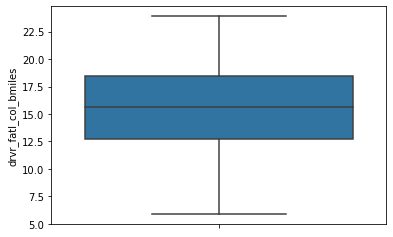

In [13]:
sn.boxplot(y=data_accidnt['drvr_fatl_col_bmiles']);

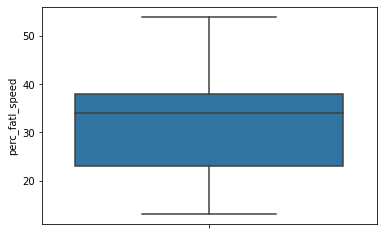

In [14]:
sn.boxplot(y=data_accidnt['perc_fatl_speed']);

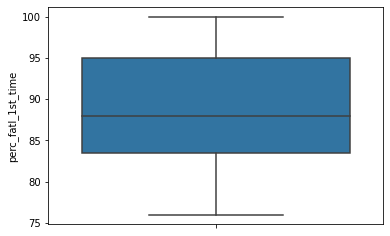

In [15]:
sn.boxplot(y=data_accidnt['perc_fatl_1st_time']);

Those three columns are not include any outliers as per the boxplots.

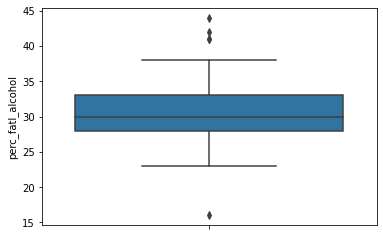

In [16]:
sn.boxplot(y=data_accidnt['perc_fatl_alcohol']);

'perc_fatl_alcohol' variable in the 'road-accidents' dataset includes outliers and should be treat them properly.

## Data Pre-Processing

Outlier treatment for 'million_miles_annually' variable in the 'miles-driven' dataset.

In [17]:
q1=np.percentile(data_miles['million_miles_annually'],25)
q3=np.percentile(data_miles['million_miles_annually'],75)
IQR=q3-q1
data_miles[data_miles['million_miles_annually']>q3+1.5*IQR ]= q3+1.5*IQR

Outlier treatment for 'perc_fatl_alcohol' variable in the 'road-accidents' dataset.

In [18]:
q1=np.percentile(data_accidnt['perc_fatl_alcohol'],25)
q3=np.percentile(data_accidnt['perc_fatl_alcohol'],75)
IQR=q3-q1
data_accidnt[data_accidnt['perc_fatl_alcohol']>(q3+1.5*IQR)]=q3+1.5*IQR
data_accidnt[data_accidnt['perc_fatl_alcohol']<(q1-1.5*IQR)]=q1-1.5*IQR

## EDA-Phase 2

Plot the boxplot after outlier treatment

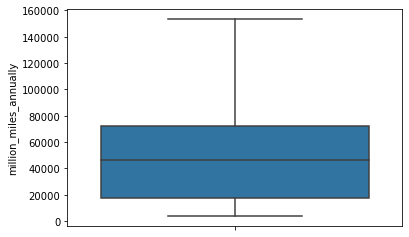

In [19]:
sn.boxplot(y=data_miles['million_miles_annually']);

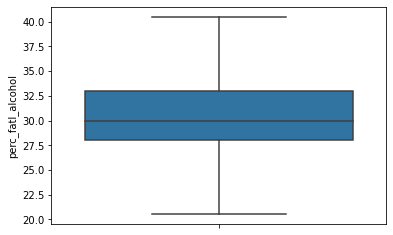

In [20]:
sn.boxplot(y=data_accidnt['perc_fatl_alcohol']);

**Bivariate Analysis**

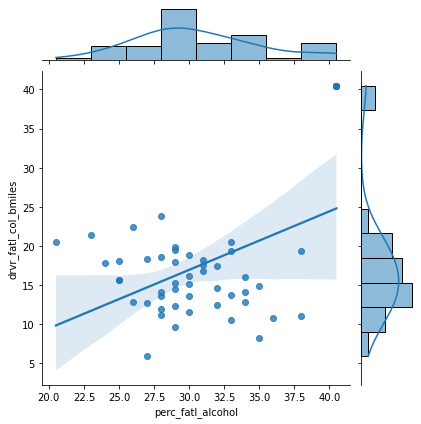

In [21]:
sn.jointplot(x='perc_fatl_alcohol',y='drvr_fatl_col_bmiles',kind='reg',data=data_accidnt);

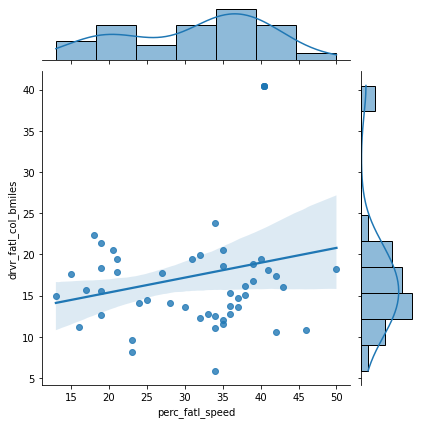

In [22]:
sn.jointplot(x='perc_fatl_speed',y='drvr_fatl_col_bmiles',kind='reg',data=data_accidnt);

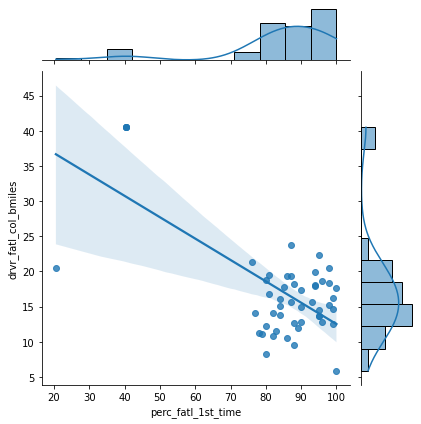

In [23]:
sn.jointplot(x='perc_fatl_1st_time',y='drvr_fatl_col_bmiles',kind='reg',data=data_accidnt);

Scatter plots shows that 'alcohol consumption' and 'speeding' variables have positive linear relationship.For the 'first-time accidents' variable has negative linear relationship.

## Feature Engineering - Feature Selection

Pearson Correlation Coefficient between Target variable and predictor variables

In [24]:
from scipy.stats import pearsonr

In [25]:
corr=pearsonr(data_accidnt['drvr_fatl_col_bmiles'],data_accidnt['perc_fatl_alcohol'])
corr[0]

0.44793983276674915

In [26]:
corr=pearsonr(data_accidnt['drvr_fatl_col_bmiles'],data_accidnt['perc_fatl_speed'])
corr[0]

0.21600274277686463

In [27]:
corr=pearsonr(data_accidnt['drvr_fatl_col_bmiles'],data_accidnt['perc_fatl_1st_time'])
corr[0]

-0.6804082508909868

Results shows that 'alcohol consumption' is  positively correlated with the accident.Also,'speeding' variable is positively correlated.But it is weak.'first-time accidents' variable is negatively correlated.Finally we can see that 'alcohol consumption' and 'first-time accidents' variables are mostly significant for the target variable.Results are match with the scatter plots which we have obtained previously.

In [28]:
import statsmodels.api as st

Split the data into Target and predictor variables.

In [29]:
X=data_accidnt.drop(data_accidnt.columns[[0,1]],axis=1)
Y=data_accidnt['drvr_fatl_col_bmiles']

In [30]:
import warnings
warnings.filterwarnings('ignore')

X_cons=st.add_constant(X)

In [31]:
lm=st.OLS(Y,X_cons).fit()

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     drvr_fatl_col_bmiles   R-squared:                       0.517
Model:                              OLS   Adj. R-squared:                  0.486
Method:                   Least Squares   F-statistic:                     16.78
Date:                  Sat, 06 Aug 2022   Prob (F-statistic):           1.51e-07
Time:                          09:22:20   Log-Likelihood:                -157.59
No. Observations:                    51   AIC:                             323.2
Df Residuals:                        47   BIC:                             330.9
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 27.2677      7.894      3.454      0.001      11.387      43.149
perc_fatl_speed        0.0292      0.097      0.300      0.765      -0.166       0.224
perc_fatl_alcohol      0.3805      0.205      1.860      0.069      -0.031       0.792
perc_fatl_1st_time    -0.2674      0.048     -5.552      0.000      -0.364      -0.171
==============================================================================
Omnibus:                        1.936   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.481
Skew:                          -0.223   Prob(JB):                        0.477
Kurtosis:                       2.294   Cond. No.                         975.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As per the P values of the predictor variables, 'alcohol consumption' and 'first-time accidents' variables are highly significant for the target variable.R squred value is 0.517.This means that 51.7% of the variation in the target variable can be explain by the 3 predictor variables.Coefficient of each predictor variables are behave same as correlation coefficients.'Alcohol consumption' and 'speeding' coefficients are positive and 'first-time accidents' coefficient is negative.'Alcohol consumption' coefficient is mostly significat with respect to other coefficients.There is no "Masking relationship" in the data.

## Feature Engineering - Feature Extraction

### Linear method-PCA

Standardize the Data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler().fit(X)

In [35]:
X_s=scaler.transform(X)

Find the principal components

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [70]:
pca=PCA()

In [71]:
PC=pca.fit_transform(X_s)

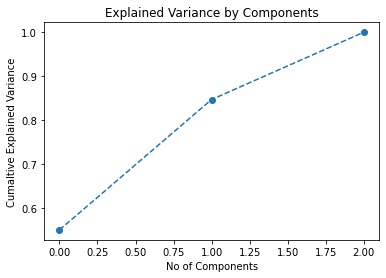

In [72]:
plt.plot(pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--');
plt.title('Explained Variance by Components');
plt.xlabel('No of Components');
plt.ylabel('Cumaltive Explained Variance');

80% variance is capture by first two principle components.So,I decided to keep only first two PCA components.

In [40]:
pca=PCA(n_components=2)

In [41]:
PC=pca.fit_transform(X_s)

In [42]:
PC_df=pd.DataFrame(data=PC,columns=['PC1','PC2'])

Propotion of variance capturing by those two features

In [43]:
Prop_var=(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])
print(f"{Prop_var:.0%}")

85%


In [44]:
PC_df.head()

,PC1,PC2
0,0.485552,-0.270043
1,-0.492172,-0.986221
2,-0.487736,-0.763547
3,-1.837348,0.356066
4,-0.301686,-0.426643


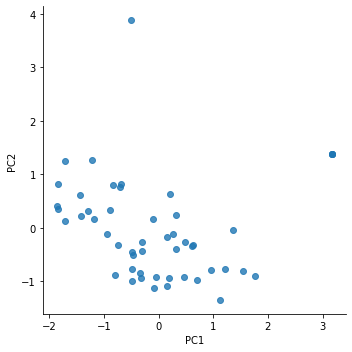

In [45]:
sn.lmplot(x="PC1",y='PC2',fit_reg=False,data=PC_df);

## Modeling

**KMeans Clustering for Scaled Data**

In [49]:
import warnings
warnings.filterwarnings('ignore')

wcss=[]
for i in range(1,10):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=10)
    kmeans_pca.fit(PC)
    wcss.append(kmeans_pca.inertia_)

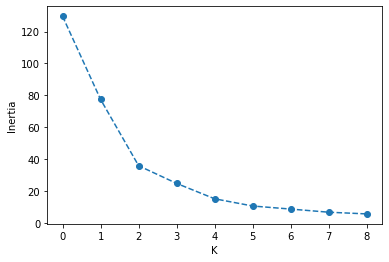

In [73]:
plt.plot(wcss,marker='o',linestyle='--');
plt.xlabel('K');
plt.ylabel('Inertia');

Let's select no of clusters as three 

In [51]:
kmeans_pca=KMeans(n_clusters=3,init='k-means++',random_state=10)
kmeans_pca.fit(PC)

KMeans(n_clusters=3, random_state=10)

In [52]:
data_pca_kmeans=pd.concat([data_accidnt,PC_df],axis=1)
data_pca_kmeans['Segments']=kmeans_pca.labels_

In [53]:
data_pca_kmeans['Area']=data_pca_kmeans['Segments'].map({
    0:'Area_1',
    1:'Area_2',
    2:'Area_3'
})

In [54]:
data_pca_kmeans.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,PC1,PC2,Segments,Area
0,Alabama,18.8,39.0,30.0,80.0,0.485552,-0.270043,1,Area_2
1,Alaska,18.1,41.0,25.0,94.0,-0.492172,-0.986221,1,Area_2
2,Arizona,18.6,35.0,28.0,96.0,-0.487736,-0.763547,1,Area_2
3,Arkansas,22.4,18.0,26.0,95.0,-1.837348,0.356066,0,Area_1
4,California,12.0,35.0,28.0,89.0,-0.301686,-0.426643,1,Area_2


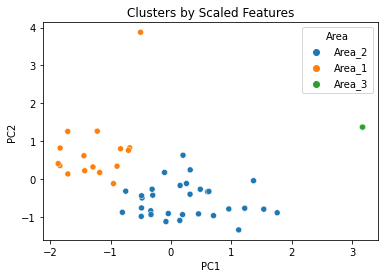

In [55]:
sn.scatterplot(x='PC1',y='PC2',hue='Area',data=data_pca_kmeans);
plt.title('Clusters by Scaled Features');

In [109]:
states_Area_2=data_pca_kmeans['state'][data_pca_kmeans['Area']=='Area_2']
states_Area_2

0                  Alabama
1                   Alaska
2                  Arizona
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
12                   Idaho
13                Illinois
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
25                Missouri
28                  Nevada
29           New Hampshire
32                New York
33          North Carolina
35                    Ohio
36                Oklahoma
37                  Oregon
38            Pennsylvania
39            Rhode Island
41            South Dakota
43                   Texas
45                 Vermont
47              Washington
48           West Virginia
49               Wisconsin
50                 Wyoming
Name: state, dtype: object

**KMeans Clustering for Unscaled Data**

In [113]:
X_imp=data_accidnt.drop(data_accidnt.columns[[0,1,2]],axis=1)

In [114]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=10)
kmeans_pca.fit(X_imp)

KMeans(n_clusters=3, random_state=10)

In [115]:
X_imp['Segments']=kmeans_pca.labels_

In [116]:
X_imp['Area']=X_imp['Segments'].map({
    0:'Area_1',
    1:'Area_2',
    2:'Area_3'
})

In [117]:
X_imp.head()

,perc_fatl_alcohol,perc_fatl_1st_time,Segments,Area
0,30.0,80.0,2,Area_3
1,25.0,94.0,0,Area_1
2,28.0,96.0,0,Area_1
3,26.0,95.0,0,Area_1
4,28.0,89.0,2,Area_3


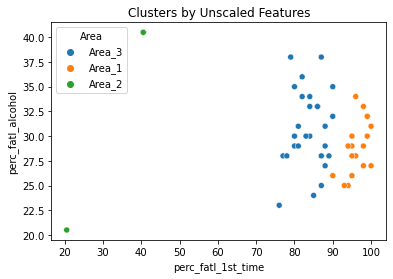

In [118]:
sn.scatterplot(x='perc_fatl_1st_time',y='perc_fatl_alcohol',hue='Area',data=X_imp);
plt.title('Clusters by Unscaled Features');

In [119]:
X_imp=X_imp.drop(X_imp.columns[[0,1]],axis=1)
data_kmeans=pd.concat([data_accidnt,X_imp],axis=1)

In [120]:
data_kmeans.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,Segments,Area
0,Alabama,18.8,39.0,30.0,80.0,2,Area_3
1,Alaska,18.1,41.0,25.0,94.0,0,Area_1
2,Arizona,18.6,35.0,28.0,96.0,0,Area_1
3,Arkansas,22.4,18.0,26.0,95.0,0,Area_1
4,California,12.0,35.0,28.0,89.0,2,Area_3


In [121]:
states_Area_3=data_kmeans['state'][data_kmeans['Area']=='Area_3']
states_Area_3

0            Alabama
4         California
6        Connecticut
15              Iowa
16            Kansas
17          Kentucky
19             Maine
21     Massachusetts
22          Michigan
23         Minnesota
25          Missouri
27          Nebraska
29     New Hampshire
30        New Jersey
32          New York
33    North Carolina
35              Ohio
38      Pennsylvania
39      Rhode Island
41      South Dakota
42         Tennessee
43             Texas
46          Virginia
47        Washington
48     West Virginia
49         Wisconsin
50           Wyoming
Name: state, dtype: object

States in the Area_2 from scaled clustering and states in the Area_3 from unscaled clustering are mostly same.

## EDA - Phase 3

Combining two Datasets

In [62]:
data_miles=data_miles.drop(data_miles.columns[[0]],axis=1)

In [63]:
data=pd.concat([data_pca_kmeans,data_miles],axis=1)

In [64]:
data['No_of_accident_per_year']=data['drvr_fatl_col_bmiles']*data['million_miles_annually']/1000

In [65]:
data.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,PC1,PC2,Segments,Area,million_miles_annually,No_of_accident_per_year
0,Alabama,18.8,39.0,30.0,80.0,0.485552,-0.270043,1,Area_2,64914.00,1220.3832
1,Alaska,18.1,41.0,25.0,94.0,-0.492172,-0.986221,1,Area_2,4593.00,83.1333
2,Arizona,18.6,35.0,28.0,96.0,-0.487736,-0.763547,1,Area_2,59575.00,1108.0950
3,Arkansas,22.4,18.0,26.0,95.0,-1.837348,0.356066,0,Area_1,32953.00,738.1472
4,California,12.0,35.0,28.0,89.0,-0.301686,-0.426643,1,Area_2,153631.25,1843.5750


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    51 non-null     object 
 1   drvr_fatl_col_bmiles     51 non-null     float64
 2   perc_fatl_speed          51 non-null     float64
 3   perc_fatl_alcohol        51 non-null     float64
 4   perc_fatl_1st_time       51 non-null     float64
 5   PC1                      51 non-null     float64
 6   PC2                      51 non-null     float64
 7   Segments                 51 non-null     int32  
 8   Area                     51 non-null     object 
 9   million_miles_annually   51 non-null     float64
 10  No_of_accident_per_year  51 non-null     float64
dtypes: float64(8), int32(1), object(2)
memory usage: 4.3+ KB


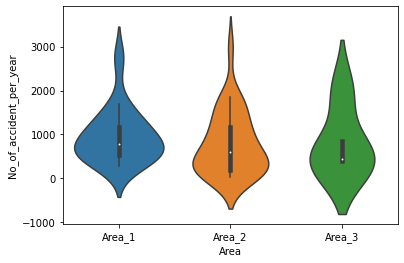

In [67]:
sn.violinplot(x='Area',y='No_of_accident_per_year',order=['Area_1','Area_2','Area_3'],data=data);

As per the violin plot's density plot,In Area_2 low level and high level has highest  probabilty that accident can be happen with respect to the other areas.So,Area_2 is the most important cluster should be considered for policy intervention and further investigation.

In [68]:
states_Area_2=data['state'][data['Area']=='Area_2']
states_Area_2

0                  Alabama
1                   Alaska
2                  Arizona
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
12                   Idaho
13                Illinois
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
25                Missouri
28                  Nevada
29           New Hampshire
32                New York
33          North Carolina
35                    Ohio
36                Oklahoma
37                  Oregon
38            Pennsylvania
39            Rhode Island
41            South Dakota
43                   Texas
45                 Vermont
47              Washington
48           West Virginia
49               Wisconsin
50                 Wyoming
Name: state, dtype: object

Above states are included to the Area_2 cluster.